In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

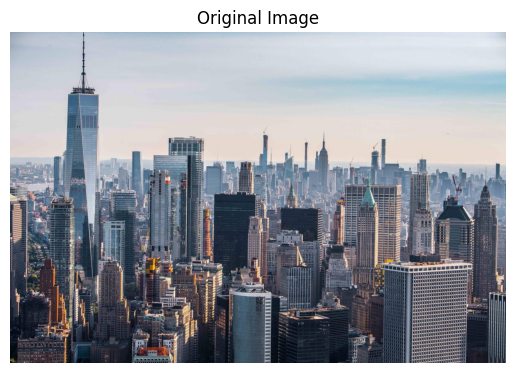

(<matplotlib.image.AxesImage at 0x1bde6c08050>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'Original Image'),
 None)

In [2]:
#blurring (detayi azaltir ve gurultuyu azaltir)

img = cv2.imread("media/city.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img),plt.axis("off"),plt.title("Original Image"),plt.show()



## ORTLAMA BULANILASTIRMA YONTEMI

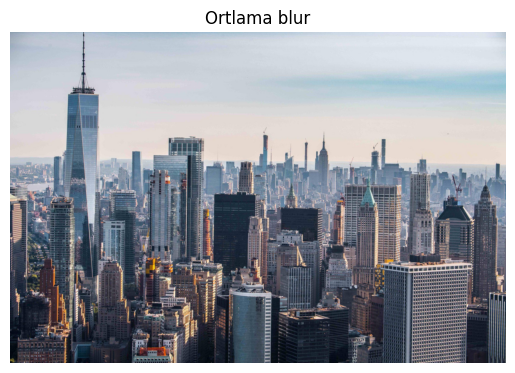

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'Ortlama blur'),
 None)

In [3]:
dst = cv2.blur(img, ksize=(3,3)) #ksize=(3,3) 3x3 luk bir kernel ile blurlama yapar

plt.figure(),plt.imshow(dst),plt.axis("off"),plt.title("Ortlama blur"),plt.show()

## GAUSSİAN BLUR

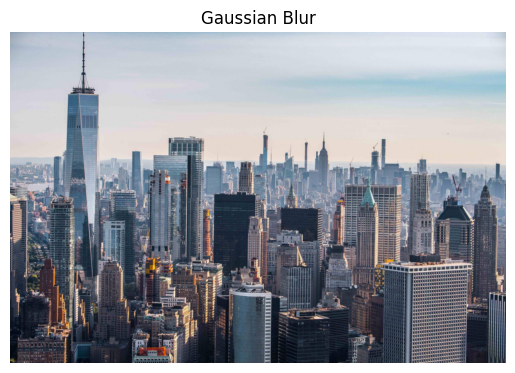

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'Gaussian Blur'),
 None)

In [6]:
gb = cv2.GaussianBlur(img,ksize=(3,3), sigmaX=7) #sigmaX=7 standart sapma degeri
plt.figure(),plt.imshow(gb),plt.axis("off"),plt.title("Gaussian Blur"),plt.show()

# MEDİAN BLUR

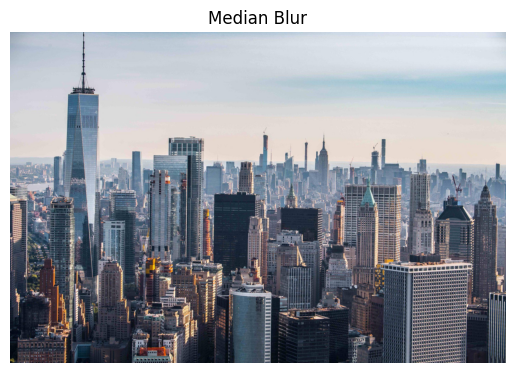

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'Median Blur'),
 None)

In [7]:
mb = cv2.medianBlur(img, ksize=3)
plt.figure(),plt.imshow(mb),plt.axis("off"),plt.title("Median Blur"),plt.show()

In [8]:
def gaussianNoise(image):
    row, col, channel = image.shape #(satir, sutun,renk kanal)
    mean = 0
    var = 0.05 #standart sapmayi hesaplamak icin kullaniyoruz
    sigma = var**0.5 #standart sapma

    gauss = np.random.normal(mean,sigma,(row,col,channel))
    gauss = gauss.reshape(row,col, channel)
    noisy = image+gauss #gurultulu resim elde ederiz

    return noisy



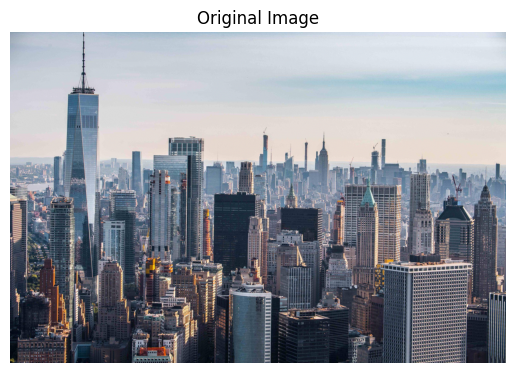

(<matplotlib.image.AxesImage at 0x1bde8a40980>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'Original Image'),
 None)

In [20]:
#ice aktar ve normalize et
#0 ile 255 arasindaki degerleri 0 ile 1 arasina normalize et cunku yukaridaki gurultu kucuk bir gurultu

img = cv2.imread("media/city.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255
plt.figure()
plt.imshow(img),plt.axis("off"),plt.title("Original Image"),plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.094610813000942..2.014578796559489].


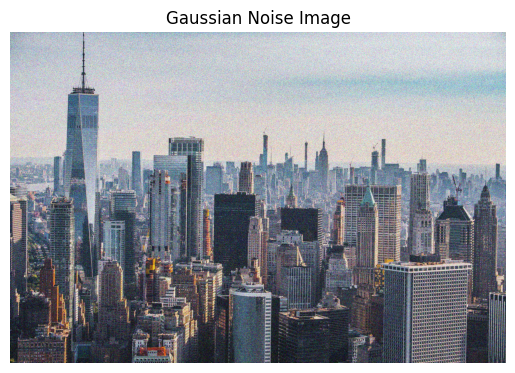

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'Gaussian Noise Image'),
 None)

In [21]:
gaussianNoiseImage = gaussianNoise(img)
plt.figure(),plt.imshow(gaussianNoiseImage),plt.axis("off"),plt.title("Gaussian Noise Image"),plt.show()

## Gaussian Blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31869122908804504..1.282621664231732].


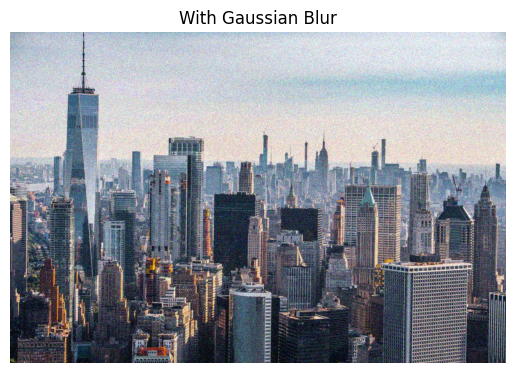

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'With Gaussian Blur'),
 None)

In [22]:

gb = cv2.GaussianBlur(gaussianNoiseImage,ksize=(3,3), sigmaX=7) #sigmaX=7 standart sapma degeri
plt.figure(),plt.imshow(gb),plt.axis("off"),plt.title("With Gaussian Blur"),plt.show()

In [50]:
def saltPepperNoise(image): #tuz biber gurultusu
    
    row,col,ch = image.shape 
    s_vs_p = 0.5 #tuz ve biber orani
    amount =0.04 #gurultu orani
    out = image.copy() #copy fonksiyonu ile orjinal resmi kopyaladik

    #salt beyaz gurultu

    num_salt = np.ceil(amount * image.size * s_vs_p)  #beyaz gurultu sayisini bulur  #ceil fonksiyonu ile yuvarlama yapar
    coords= [np.random.randint(0, i-1, int(num_salt)) for i in image.shape] #gurultu ekleyecegimiz koordinatlari belirler(rastgele)
    
    out[coords[0],coords[1]]=255  #beyaz noktacik ekler

    #pepper siyah gurultu
    num_pepper = np.ceil(amount* image.size* (1-s_vs_p))  #beyaz gurultu sayisini bulur  #ceil fonksiyonu ile yuvarlama yapar
    coords= [np.random.randint(0,i-1,int(num_pepper)) for i in image.shape] #gurultu ekleyecegimiz koordinatlari belirler(rastgele)
    
    out[coords[0],coords[1]]=0 #siyah noktacik ekler

    return out


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


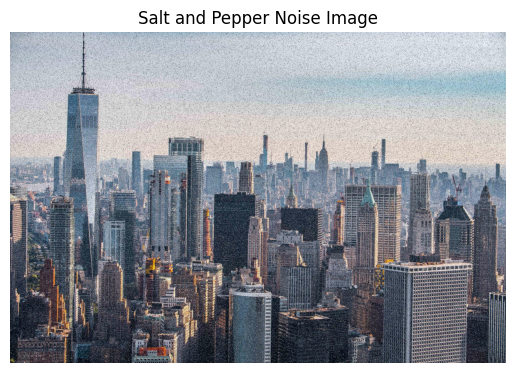

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'Salt and Pepper Noise Image'),
 None)

In [51]:
img = cv2.imread("media/city.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255

spImage = saltPepperNoise(img) #float tipine donusturduk

plt.figure(),plt.imshow(spImage),plt.axis("off"),plt.title("Salt and Pepper Noise Image"),plt.show()

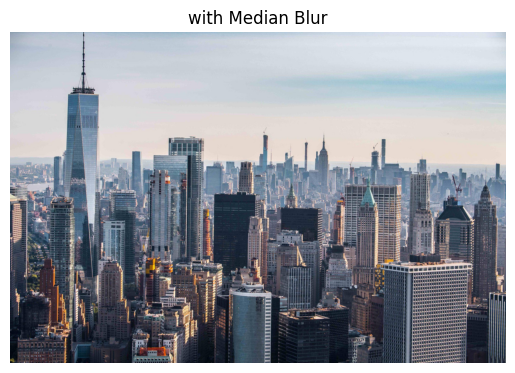

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 2559.5, 1706.5, -0.5),
 Text(0.5, 1.0, 'with Median Blur'),
 None)

In [53]:
mb2 = cv2.medianBlur(spImage.astype(np.float32), ksize=3)
plt.figure(),plt.imshow(mb),plt.axis("off"),plt.title("with Median Blur"),plt.show()